# Trzęsienia ziemi w Stanach Zjednoczonych
## Anna Gawłowska
## Opis Danych

Dane dotyczą trzęsień ziemi w Stanach Zjednoczonych. Zawierają 1013 wierszy odpowiadających 1013 osobom biorącym udział w ankiecie. 

 Dane są: 
- wiek
- płeć
- całkowity roczny dochód rodziny 
- zamieszkiwany region USA

##### Dane zawierają odpowiedzi na następujące pytania dotyczące trzęsień Ziemi:
 
- In general, how worried are you about earthquakes?
- How worried are you about the Big One, a massive, catastrophic earthquake?
- Do you think the "Big One" will occur in your lifetime?
- Have you ever experienced an earthquake?
- Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?
- How familiar are you with the San Andreas Fault line?
- How familiar are you with the Yellowstone Supervolcano?



In [188]:
import pandas as pd
import matplotlib.pyplot as plt

In [189]:
%matplotlib inline

In [190]:
data_csv = pd.read_csv("earthquake_data.csv")
data_csv



In general, how worried are you about earthquakes?  \
0                                    Not at all worried   
1                                      Somewhat worried   
2                                        Not so worried   
3                                        Not so worried   
4                                        Not so worried   
5                                    Not at all worried   
6                                          Very worried   
7                                    Not at all worried   
8                                    Not at all worried   
9                                    Not at all worried   
10                                   Not at all worried   
11                                   Not at all worried   
12                                    Extremely worried   
13                                     Somewhat worried   
14                                       Not so worried   
15                                       Not so worried   
16                                   Not at all worried   
17                                       Not so worried   
18                                       Not so worried   
19                                         Very worried   
20                                   Not at all worried   
21                                   Not at all worried   
22                                   Not at all worried   
23                                       Not so worried   
24                                   Not at all worried   
25                                    Extremely worried   
26                                   Not at all worried   
27                                   Not at all worried   
28                                     Somewhat worried   
29                                       Not so worried   
...                                                 ...   
983                                      Not so worried   
984                                      Not so worried   
985                                  Not at all worried   
986                                  Not at all worried   
987                                  Not at all worried   
988                                   Extremely worried   
989                                      Not so worried   
990                                      Not so worried   
991                                    Somewhat worried   
992                                  Not at all worried   
993                                      Not so worried   
994                                  Not at all worried   
995                                      Not so worried   
996                                  Not at all worried   
997                                      Not so worried   
998                                      Not so worried   
999                                  Not at all worried   
1000                                 Not at all worried   
1001                                     Not so worried   
1002                                 Not at all worried   
1003                                   Somewhat worried   
1004                                 Not at all worried   
1005                                     Not so worried   
1006                                 Not at all worried   
1007                                 Not at all worried   
1008                                 Not at all worried   
1009                                     Not so worried   
1010                                     Not so worried   
1011                                 Not at all worried   
1012                                   Somewhat worried   

     How worried are you about the Big One, a massive, catastrophic earthquake?  \
0                                        Not so worried                           
1                                          Very worried                           
2                                      Somewhat worried                           
3             

### Charakterystyka danych
Dane zawierają cechy:
- ilościowe (wiek, dochód) 
- jakościowe
 - nomianlne - np. region zamieszkania
 - porządkowe - pytania w stylu "W jakim stopniu jesteś zaznajomiony z jakimś zjawiskiem?")
 
Każde z pytań dopuszcza brak odpowiedzi. W takiej sytuacji wartością jest NaN. 

In [191]:
full_questions = list(data_csv.columns.values)
data_csv.columns = ['q0','q1','q2','q3','q4','q5', 'q6','age','gender','income', 'region']


### Podstawowe dane o ankietowanych


In [192]:
def plot_pie(column_name, title):
    d = data_csv.iloc[:,(0,3)]
    data_csv[column_name].value_counts().plot(kind='pie', colormap="Purples",figsize=(6,6), fontsize=14)
    plt.axis('equal')
    plt.title(title, y=1.08,fontsize=18)

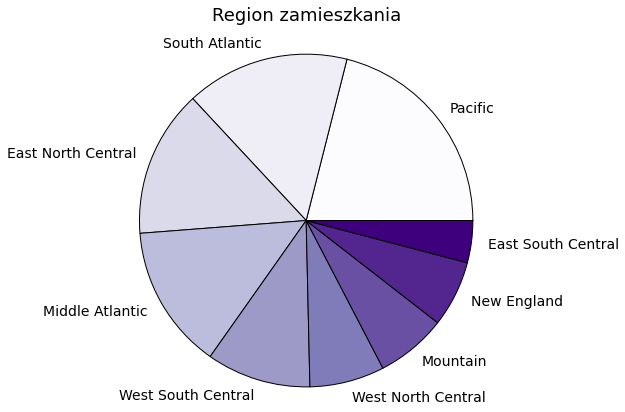

In [193]:
plot_pie('region', 'Region zamieszkania')

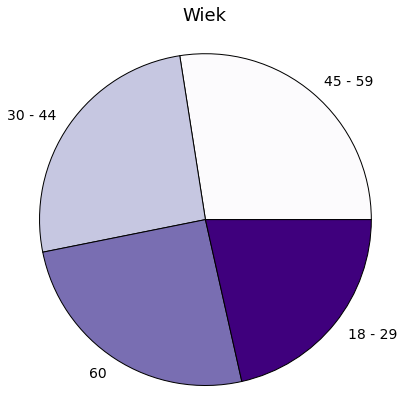

In [194]:
plot_pie('age', 'Wiek')

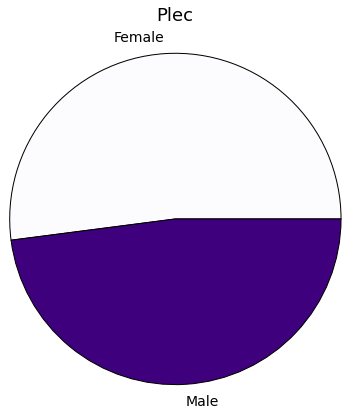

In [195]:
plot_pie('gender', 'Plec')

In [196]:
questions = list(data_csv.columns.values)

### Największe trzęsienia ziemi w Stanach Zjednoczonych

Poniższe dane pochodzą ze strony http://earthquake.usgs.gov/
Zawierają informacje o trzęsieniach silniejszych jest 1 stopień, które wystąpiły w ciągu ostatnich 7 dni

In [197]:
import csv

# Open the earthquake data file.
filename = '1.0_week.csv'
data_earth = pd.DataFrame.from_csv(filename)
data_earth
# Create empty lists for the data we are interested in.
lats, lons = data_earth[data_earth.columns[1]], data_earth[data_earth.columns[2]]
magnitudes = data_earth[data_earth.columns[4]]
timestrings = data_earth[data_earth.columns[0]]
# list(data_earth.columns.values)


In [198]:
places = []
for d in data_earth['place']:
    places.append(d.split()[-1])
myset = set(places)
# print myset  
# print data[questions[-1]].unique()

In [199]:
us_states = ['Oklahoma', 'Hawaii', 'Wyoming', 'Arkansas', 'Idaho','Kansas', 'Utah', 'Oregon', 
             'Montana', 'California', 'CA',  'Alaska', 'Hawaii', 'Missouri', 'Washington', 'Maine',
             'Tennessee', 'Nevada']
us_regions = data_csv[questions[-1]].unique()

city_to_state = {
    'Oklahoma':'West South Central',
    'Wyoming':'Mountain',
    'Arkansas':'West South Central',
    'Idaho':'Mountain',
    'Kansas':'West North Central',
    'Utah':'Mountain',
    'Oregon':'Pacific',
    'Montana':'Mountain',
    'California':'Pacific',
    'CA':'Pacific',
    'Alaska':' ',
    'Hawaii':' ',
    'Missouri':'West North Central',
    'Washington':'Pacific',
    'Maine':'New England',
    'Tennessee':'East South Central',
    'Nevada':'Mountain',
}


### Zamiana na wartości nominalne
Do grupowania danych konieczna jest zamiana wartości nomianlnych na wartości liczbowe.

Tworzę kopię danych, której opisowe wartości będą przetransformowane na wartości nominalne, oraz zamieniam nawy kolumn na wygodniejsze w użyciu.

In [200]:
data_categorical = pd.read_csv("earthquake_data.csv")
data_categorical.columns = ['q0','q1','q2','q3','q4','q5', 'q6','age','gender','income', 'region']

Dla każdego z pytań wyciągam wszystkie występujące odpowiedzi i sortuję (jest to konieczne do poprawnego działania zdefiniowanych dalej funkcji).

Na razie nie zastępuję niczym wartości nan.

In [201]:
q_uniques = [data_csv[questions[i]].unique() for i in range(7)] + [data_csv[questions[8]].unique(), data_csv[questions[10]].unique()]
for i in range(9):
    q_uniques[i] = sorted(q_uniques[i])
    
for q in q_uniques:
    print q

['Extremely worried', 'Not at all worried', 'Not so worried', 'Somewhat worried', 'Very worried']
['Extremely worried', 'Not at all worried', 'Not so worried', 'Somewhat worried', 'Very worried']
['No', 'Yes']
[nan, 'No', 'Yes, one or more major ones', 'Yes, one or more minor ones']
[nan, 'No', 'Yes']
[nan, 'Extremely familiar', 'Not at all familiar', 'Not so familiar', 'Somewhat familiar', 'Very familiar']
[nan, 'Extremely familiar', 'Not at all familiar', 'Not so familiar', 'Somewhat familiar', 'Very familiar']
[nan, 'Female', 'Male']
[nan, 'East North Central', 'East South Central', 'Middle Atlantic', 'Mountain', 'New England', 'Pacific', 'South Atlantic', 'West North Central', 'West South Central']


Do zamiany z wartości opisowych na nominalne (i w drugą stronę) służą poniższe funkcje:

In [202]:
from sklearn import preprocessing
le_data = preprocessing.LabelEncoder()

def to_categorical(column_nr, column):
    le_data.fit(q_uniques[column_nr])
    return le_data.fit_transform(column)
    
def from_categorical(column):
    
    column = le_data.inverse_transform(column)
    return column

data_categorical.q0 = to_categorical(0,data_categorical.q0 )
data_categorical.q1 = to_categorical(1,data_categorical.q1 )
data_categorical.q2 = to_categorical(2,data_categorical.q2 )
data_categorical.q3 = to_categorical(3,data_categorical.q3 )
data_categorical.q4 = to_categorical(4,data_categorical.q4 )
data_categorical.q5 = to_categorical(5,data_categorical.q5 )
data_categorical.q6 = to_categorical(6,data_categorical.q6 )
data_categorical.gender = to_categorical(7,data_categorical.gender )
data_categorical.region = to_categorical(8,data_categorical.region )

Poniżej przykład działania - początek pierwszej kolumny z data frame'u z wartościami zamienionymi na nominalne i ta sama kolumna z orginalnego data frame'u

In [203]:
for x in range(10):  
    print data_categorical.q0[x], data_csv.q0[x]

1 Not at all worried
3 Somewhat worried
2 Not so worried
2 Not so worried
2 Not so worried
1 Not at all worried
4 Very worried
1 Not at all worried
1 Not at all worried
1 Not at all worried


W następujący sposób można odzyskać odpowiedź z nadanego numeru:
np. gdy chcę odzyskać odpowiedź na pytanie nr 1 (ilcząc od 0) oznaczone jako 3:

In [204]:
q_uniques[1][3]

'Somewhat worried'

Dla poprawy czytelności zrobię osobną funkcję: 

In [205]:
def getAnswerFromLabel(question_nr, label):
    return q_uniques[question_nr][label]

getAnswerFromLabel(2, 1)

'Yes'

Dla ułatwienia korzystania ze zmienionych danych, zapiszę pierwsze 6 kolumn do odzielnego pliku

In [206]:
data_categorical.iloc[:,(1,2,3,4,5,6,8,10)].to_csv('output.txt')

In [207]:
# data_csv.q0 = from_categorical(data_csv.q0)
# data_csv.q1 = from_categorical(data_csv.q1)
# data_csv.q2 = from_categorical(data_csv.q2)
# data_csv.q3 = from_categorical(data_csv.q3)
# data_csv.q4 = from_categorical(data_csv.q4)
# data_csv.q5 = from_categorical(data_csv.q5)
# data_csv.q6 = from_categorical(data_csv.q6)

## Klastrowanie
Do klastrowania użyję gotowej implementacji algorytmu k-modes (źródło: https://github.com/nicodv/kmodes)

(opis na podstawie https://shapeofdata.wordpress.com/2014/03/04/k-modes/)

Algorytm k-modes jest odmianą algorytmu k-means dedykowaną do pracy z danymi nominalnymi.
Każda z kolumn zbioru danych jest rozdzielana na n (gdzie n jest liczbą wartości - tu: odpowiedzi na dane pytanie) kolumn zero-jedynkowych, w taki sposób, że w i-tej kolumnie jedynki są w miejscach, w których w orginalnym zbiorze występowała wartość i.
Następnie wybierane są centroidy. Centroidem danego klastra będzie wartość najczęściej występująca w danej kolumnie (czyli moda).
W przeciwieństwie do k-means, do obliczenia odległości punktów od centroidów nie zostanie użyta odległość euklidesowa.
Odległość pomiędzy dwoma wektorami odpowiedzi jest zdefiniowana jako liczba pytań, na które udzielone zostały różne odpowiedzi.



Poniżej wykonałam ten algorytm na wszystkich sześciu kolumnach, dla 2, 4 i 8 klastrów. 
Wyniki przedstawiają uzyskane centroidy i liczności klastrów.

In [208]:
import numpy as np
from kmodes_master import kmodes 

x = np.genfromtxt('output.txt', dtype=int, delimiter=',', skip_header=True)[:, 1:]
# print x

for n in [2, 4, 8]:
    print "\n### liczba klastrów: ", n
    kmodes_huang = kmodes.kmodes.KModes(n_clusters=n, init='Huang', verbose=1)
    fitted = kmodes_huang.fit_predict(x)
    clusters_count = [0 for _ in range(n)]

    for i, c in enumerate(fitted):
        clusters_count[c] += 1

    for i in range(n):
        print "centroid ", i, ": ", kmodes_huang.cluster_centroids_[i], " liczność: ", clusters_count[i]





### liczba klastrów:  2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 256, cost: 3849.0
Run 1, iteration: 2/100, moves: 0, cost: 3849.0
centroid  0 :  [2 1 3 1 4 4 1 6]  liczność:  610
centroid  1 :  [1 0 3 1 4 2 2 1]  liczność:  403

### liczba klastrów:  4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 202, cost: 3333.0
Run 1, iteration: 2/100, moves: 140, cost: 3306.0
Run 1, iteration: 3/100, moves: 78, cost: 3275.0
Run 1, iteration: 4/100, moves: 17, cost: 3275.0
centroid  0 :  [3 1 3 2 5 5 1 6]  liczność:  288
centroid  1 :  [1 0 3 1 5 2 2 6]  liczność:  246
centroid  2 :  [2 0 3 1 4 4 2 1]  liczność:  259
centroid  3 :  [1 0 1 1 4 2 1 3]  liczność:  220

### liczba klastrów:  8
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 242, cost: 2878.0
Run 1, iteration: 2/100, moves: 0, cost: 2878

## Czy miejsce zamieszkania ma wpływ na przygotowania na ewentualne trzęsienie?

Według danych dostępnych na stronie http://earthquake.usgs.gov:
- 11 z 35 największych (>7.3 w skali 1-10) trzęsień w USA miało miejsce na Alasce
- 10 w Kaliforni (Pacific)
- 6 w Missourri (West North Central)
Czy ma to wpływ na odpowiedzi ankietowanych?


Żadnen z regionów nie uwzględnia Alaski, dlatego poniżej porównuję odpowiedzi osób, które mieszkają w regionie Pacific albo West North Central (drugi wykres) z mieszkańcami pozostałych stanów (z wyłączeniem osób, które nie podały miejsca zamieszkania) (trzeci wykres)

### Podejmowanie przygotowań - rejony, w których trzęsienia występują najczęściej

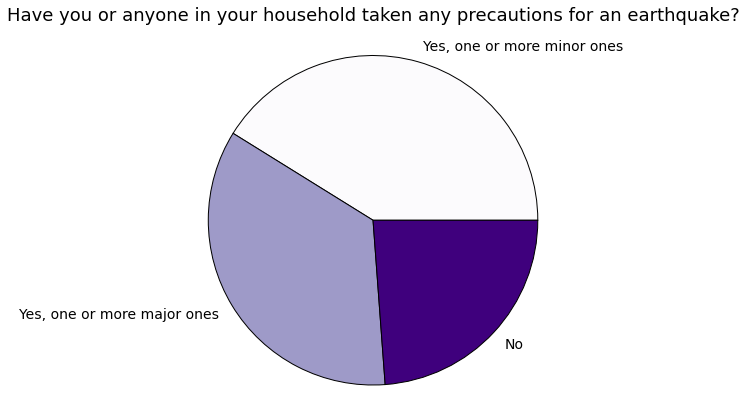

In [209]:
pacific=data_csv.loc[data_csv['region'].isin(['Pacific','West North Central'])]

pacific['q3'].value_counts().plot(kind='pie', colormap="Purples",figsize=(6,6), fontsize=14)
plt.axis('equal')
plt.title("Have you or anyone in your household taken any precautions for an earthquake?", y=1.08,fontsize=18)


### Podejmowanie przygotowań - pozostałe rejony

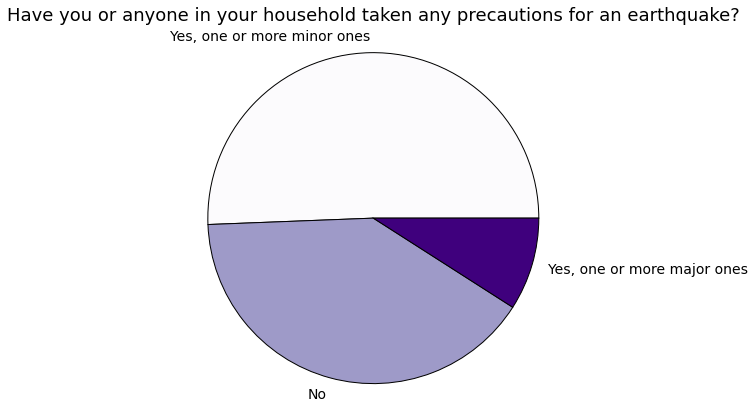

In [212]:
non_pacific=data_csv.loc[~data_csv['region'].isin(['Pacific','West North Central'])]
non_pacific['q3'].value_counts().plot(colormap="Purples",kind='pie',figsize=(6,6), fontsize=14)
plt.axis('equal')
plt.title("Have you or anyone in your household taken any precautions for an earthquake?", y=1.08,fontsize=18)

### Klastrowanie
Region zamieszkania + kilka pytań o trzęsienia ziemi

In [213]:

import numpy as np
from kmodes_master import kmodes 

COLUMNS = [1,3,4,8] 
x = np.genfromtxt('output.txt', dtype=int, delimiter=',', skip_header=True)[:, COLUMNS]
print "\n###### Questions: "
for c in COLUMNS:
    print full_questions[c]
y = np.genfromtxt('output.txt', dtype=int, delimiter=',', usecols=(1, ))

for n in [2, 4, 8]:
    print "\n### liczba klastrów: ", n
    kmodes_huang = kmodes.kmodes.KModes(n_clusters=n, init='Huang', verbose=0)
    fitted = kmodes_huang.fit_predict(x)
    clusters_count = [0 for _ in range(n)]

    for i, c in enumerate(fitted):
        clusters_count[c] += 1
    print "klastry:"
    for i in range(n):
                   
        clu = kmodes_huang.cluster_centroids_
                   
                   
        cluster_questions = [getAnswerFromLabel(COLUMNS[j], clu[i][j]) for j in range(len(clu[i]))]
        print cluster_questions, clusters_count[i]


###### Questions: 
How worried are you about the Big One, a massive, catastrophic earthquake?
Have you ever experienced an earthquake?
Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?
What is your gender?

### liczba klastrów:  2
klastry:
['Not at all worried', 'No', 'No', 'Pacific'] 627
['Not so worried', 'Yes, one or more minor ones', 'No', 'Pacific'] 386

### liczba klastrów:  4
klastry:
['Somewhat worried', 'Yes, one or more minor ones', 'No', 'Middle Atlantic'] 354
['Not so worried', 'Yes, one or more minor ones', 'No', 'East North Central'] 274
['Not at all worried', 'No', 'No', 'West South Central'] 231
['Somewhat worried', 'Yes, one or more major ones', 'Yes', 'Pacific'] 154

### liczba klastrów:  8
klastry:
['Not at all worried', 'No', 'No', 'Middle Atlantic'] 328
['Somewhat worried', 'Yes, one or more major ones', 'No', 'Pacific'] 171
['Not so worried', 'No', 'No', 'West South

## Czy płeć ma wpływ na wiarę w nadchodzące wielkie trzęsienie?

Z poniżyszych wykresów wynika, że płeć nie ma tu większego znaczenia. 

### Kobiety

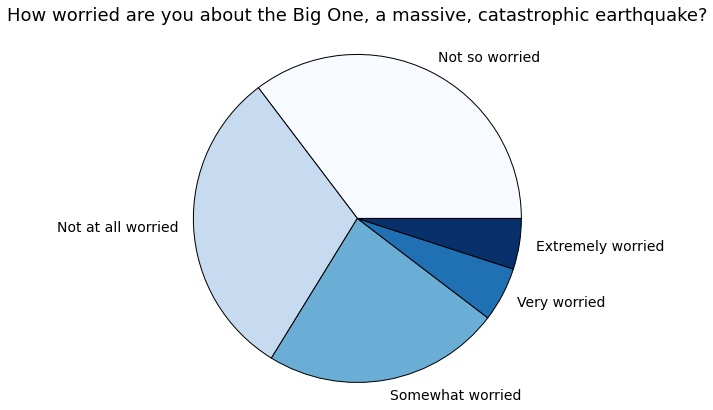

In [214]:
female=data_csv.loc[data_csv['gender']=="Female"]


female['q0'].value_counts().plot(kind='pie', colormap="Blues",figsize=(6,6), fontsize=14)
plt.axis('equal')
plt.title("How worried are you about the Big One, a massive, catastrophic earthquake?", y=1.08,fontsize=18)


### Mężczyźni

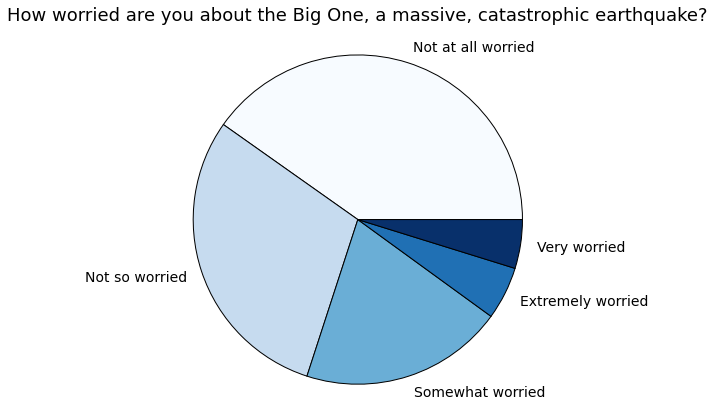

In [215]:
male=data_csv.loc[data_csv['gender']=="Male"]


male['q0'].value_counts().plot(kind='pie', colormap="Blues",figsize=(6,6), fontsize=14)
plt.axis('equal')
plt.title("How worried are you about the Big One, a massive, catastrophic earthquake?", y=1.08,fontsize=18)

### Klastrowanie
Poniżej klastrowanie wykonane jedynie na dwóch pierwszych pytaniach oraz na kolumnie oznaczącej płeć. 

Wartości nominalne zostały zamienione na orginalne odpowiedzi.


Dodatkowo, w celu sprawdzenia, czy na odpowiedzi ma wpływ płeć ankietowanych, zliczam ile kobiet i ile mężczyzn jest w poszczególnych klastrach.

In [216]:

import numpy as np
from kmodes_master import kmodes 

N_CLUSTERS = 4
COLUMNS = [1,2,7] 
x = np.genfromtxt('output.txt', dtype=int, delimiter=',', skip_header=True)[:, COLUMNS]
print "\n###### Questions: "
for c in COLUMNS:
    print full_questions[c+1]
y = np.genfromtxt('output.txt', dtype=int, delimiter=',', usecols=(1, ))

for n in [2, 4, 8]:
    print "\n### liczba klastrów: ", n
    kmodes_huang = kmodes.kmodes.KModes(n_clusters=n, init='Huang', verbose=1)
    fitted = kmodes_huang.fit_predict(x)
    clusters_count = [0 for _ in range(n)]

    for i, c in enumerate(fitted):
        clusters_count[c] += 1
    print "klastry:"
    for i in range(n):
        males = [0 for _ in range(clusters_count[i])]
        females = [0 for _ in range(clusters_count[i])]
                   
        clu = kmodes_huang.cluster_centroids_
                   
                   
        cluster_questions = [getAnswerFromLabel(COLUMNS[j], clu[i][j]) for j in range(len(clu[i]))]
        print cluster_questions, clusters_count[i]


###### Questions: 
Do you think the "Big One" will occur in your lifetime?
Have you ever experienced an earthquake?
What is your gender?

### liczba klastrów:  2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 189, cost: 1059.0
Run 1, iteration: 2/100, moves: 4, cost: 1059.0
klastry:
['Not at all worried', 'No', 'Female'] 694
['Somewhat worried', 'Yes', 'Male'] 319

### liczba klastrów:  4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 879.0
klastry:
['Not so worried', 'No', 'Female'] 554
['Somewhat worried', 'Yes', 'Female'] 166
['Somewhat worried', 'Yes', 'Male'] 245
['Somewhat worried', 'No', 'Female'] 48

### liczba klastrów:  8
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 73, cost: 383.0
Run 1, iteration: 2/100, moves: 0, cost: 383.0
klastry:
['Somewhat worried', 'Yes', 'Male'] 